In [245]:
import emoji
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
import matplotlib.pyplot as plt
import numpy as np
import enchant
tknzr = TweetTokenizer(strip_handles=False, reduce_len=False)
wordnet_lemmatizer = WordNetLemmatizer()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [246]:
with open('ig_corpus.txt', "r") as file:
        text = file.read()
        tokens = tknzr.tokenize(text.decode("utf-8"))

In [270]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in xrange(0, len(l), n):
        yield l[i:i + n]

In [271]:
subcorpora = list(chunks(tokens, 12429464))

In [268]:
len(tokens)/float(5)

12429463.6

In [272]:
len(subcorpora)

5

In [276]:
from collections import Counter

In [279]:
words, freqs = zip(*Counter(tokens).most_common(500))

In [281]:
freqs[0]
words[0]

u'!'

In [284]:
freqlists = []
for corpus in subcorpora:
    corpusfreq = Counter(corpus).items()
    #print corpusfreq[0][0]
    #print corpusfreq[0]
    select = filter(lambda x: x[0] in words, corpusfreq)
    counts = map(lambda x: x[1], select)
    freqlists.append(counts)

@cristinaaaribeiro
(u'@cristinaaaribeiro', 1)
@b1gmc
(u'@b1gmc', 1)
@kedstanton
(u'@kedstanton', 1)
@allie_ortiz
(u'@allie_ortiz', 1)
@kedstanton
(u'@kedstanton', 1)


In [291]:
freqlists2 = []
for fr in freqlists:
    missing_words = 500 - len(fr)
    for i in range(missing_words):
        fr.append(0)

In [298]:
len(freqlists[4])

500

In [273]:
np.array(subcorpora).shape

(5,)

In [274]:
from scipy.stats import chisquare

In [300]:
chi_sq_res, p_vals = chisquare(freqlists)

In [301]:
len(chi_sq_res)

500

In [304]:
sum(chi_sq_res)/float(len(chi_sq_res))

139466.34469425381

In [305]:
sum(chi_sq_res)/float(len(chi_sq_res))
sum(p_vals)/float(len(p_vals))

1.5887346179139897e-42

In [219]:
len(tokens)

62147318

In [220]:
len(tokens)

62147318

In [229]:
len(set(tokens))

2369580

In [221]:
def extract_emojis(words):
    return ''.join(c for c in words if c in emoji.UNICODE_EMOJI)

In [222]:
emojis = extract_emojis(tokens)

In [223]:
len(emojis)

9582526

In [224]:
def extract_hashtags(tokens):
    return [x for x in tokens if x.startswith("#")]

In [225]:
hashtags = extract_hashtags(tokens)act

In [226]:
len(hashtags)

1800445

In [227]:
d = enchant.Dict("en_US")

In [308]:
def clean(token):
    if token.startswith("#"):
        return False
    if token in emoji.UNICODE_EMOJI:
        return False
    if token.startswith("@"):
        return False
    return True

In [412]:
tokens_clean = filter(lambda x: clean(x), tokens)

In [413]:
len(tokens_clean)

47095723

In [369]:
len(tokens_clean)/5

9419144

In [423]:
posts = []
with open('ig_corpus.txt', "r") as file:
    for line in file:
        posts.append(line)
        #text = file.read()
        #tokens = tknzr.tokenize(text.decode("utf-8"))

In [424]:
len(posts)

197046

In [425]:
posts[0]

"love the sky blue! @kiki_dkpearla me too! thanks love  happy monday love the bag!! \xf0\x9f\x92\x95\xf0\x9f\x92\x96 @jessicalundy_ isn\xe2\x80\x99t it fun. thanks love. that bag is so pretty!! @cherrypickedstyle thank you tomeka i hope you are having an awesome monday beautiful bag! \xf0\x9f\x92\x99\xf0\x9f\x92\x99 love this bag \xf0\x9f\x92\x99\xf0\x9f\x92\x99\xf0\x9f\x92\x99 omg love it \xf0\x9f\x98\x8d\xf0\x9f\x98\x8d great stuff! love the bag \xf0\x9f\x98\x8d\xf0\x9f\x98\x8d\xf0\x9f\x98\x8d details \xf0\x9f\x98\x8d love this bag babe \xf0\x9f\x92\x99\xf0\x9f\x92\x99 that\xe2\x80\x99s a great bag! \xf0\x9f\x91\x8b\xf0\x9f\x91\x8c love this fun pop of color love this love @henribendel's latest collection! i just love this pop of bright blue color. \xf0\x9f\x92\x99\xf0\x9f\x92\x99 \xf0\x9f\x91\x8d\xf0\x9f\x8f\xbc\xf0\x9f\x99\x8c\xf0\x9f\x8f\xbd\xf0\x9f\x94\xa5 such a gorgeous bag bag\xf0\x9f\x98\x8d\xf0\x9f\x98\x8d\xf0\x9f\x98\x8d\xf0\x9f\x98\x8d \xf0\x9f\x92\x99\xf0\x9f\x92\x99\xf0\

In [400]:
import random

In [426]:
random.shuffle(posts)

In [427]:
posts[0]

'\xf0\x9f\x91\x8c <saturdays> #mornings #research #coffee #saturdays #lazyday lazyday coffee mornings saturdays research\n'

In [428]:
len(posts)/float(5)

39409.2

In [429]:
subcorpora2 = list(chunks(posts, 39410))

In [430]:
len(subcorpora2)

5

In [431]:
subcorpora3 = []
for corpus in subcorpora2:
    c = ""
    for post in corpus:
        c = c + post
    subcorpora3.append(c)

In [434]:
subcorpora3 = map(lambda x: tknzr.tokenize(x.decode("utf-8")), subcorpora3)

In [480]:
from nltk.corpus import stopwords

In [481]:
stop_words = set(stopwords.words('english'))
stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}'])

In [483]:
subcorpora3 = map(lambda x: [y for y in x if y not in stop_words], subcorpora3)

In [452]:
subcorpora4 = []
for corpus in subcorpora3:
    c = filter(lambda x: clean(x), corpus)
    subcorpora4.append(c)

In [453]:
print len(subcorpora4)
print len(subcorpora4[0])

5
9595152


In [484]:
subcorpora5 = map(lambda x: x[0:1000000], subcorpora3)

In [487]:
print len(subcorpora5)
print len(subcorpora5[0])
print subcorpora5[0][4]

5
1000000
#coffee


In [488]:
subcorpora = subcorpora5

In [402]:
random.shuffle(tokens_clean)

In [414]:
tokens_clean2 = tokens_clean[0:5000000]

In [489]:
tokens3 = []
for t in subcorpora:
    tokens3 = tokens3 + t

In [490]:
words, freqs = zip(*Counter(tokens3).most_common(500))

In [494]:
print words[315]

thing


In [416]:
subcorpora = list(chunks(tokens_clean2, 1000000))

In [495]:
print len(subcorpora)
len(subcorpora[0])

5


1000000

In [496]:
freqlists = []
for corpus in subcorpora:
    corpusfreq = Counter(corpus)
    print "corpus"
    #print corpusfreq[0][0]
    #print corpusfreq[0]
    select = []
    for w in words:
        #print w
        #print type(corpusfreq)
        #print corpusfreq.keys()[0]
        #print corpusfreq
        if w in corpusfreq:
            select.append(corpusfreq[w])
        else:
            select.append(0)
    freqlists.append(select)

corpus
corpus
corpus
corpus
corpus


In [497]:
print len(freqlists)
print len(freqlists[0])
print len(freqlists[1])
print freqlists[0][2]
print freqlists[1][2]
print freqlists[2][2]
print freqlists[0]

5
500
500
25300
24331
27425
[49117, 29389, 25300, 24835, 10781, 9465, 8862, 8886, 7844, 6827, 6720, 6759, 6467, 6326, 5813, 5826, 5304, 4944, 4641, 4348, 4244, 4194, 3899, 3663, 3602, 3671, 3850, 3506, 3420, 3038, 3304, 3096, 3132, 3183, 2890, 2983, 2588, 2879, 2740, 2987, 2674, 2676, 2392, 2467, 2611, 2505, 1980, 2436, 2162, 2196, 2209, 2135, 2065, 2109, 2142, 2178, 2066, 2019, 1949, 2027, 1790, 1801, 1875, 1726, 1723, 1719, 1921, 1819, 1735, 1807, 1590, 1648, 1688, 1573, 1588, 1582, 1692, 1388, 1477, 1312, 1478, 1641, 1459, 1388, 1478, 1499, 1522, 1308, 1341, 1397, 1257, 1368, 1405, 1399, 1372, 1287, 1275, 1258, 1327, 1217, 1049, 1204, 1156, 1142, 1180, 1088, 1121, 1056, 1057, 962, 1119, 1125, 1071, 1116, 1064, 1007, 986, 954, 1018, 1028, 1035, 984, 1037, 991, 702, 984, 1062, 894, 505, 925, 909, 868, 912, 915, 726, 841, 827, 840, 792, 828, 832, 849, 872, 788, 827, 737, 800, 772, 763, 788, 784, 370, 478, 803, 755, 786, 705, 764, 784, 716, 642, 363, 739, 664, 704, 668, 707, 704, 773, 7

In [498]:
chi_sq_res, p_vals = chisquare(freqlists)

In [499]:
sum(chi_sq_res)/float(len(chi_sq_res))

46.337458598749343

In [500]:
sum(p_vals)/float(len(p_vals))

0.17817832850514118

In [331]:
def extract_oov2(y):
    print len(y)
    return [x for x in y if d.check(x)]

In [362]:
def extract_testt(tokenlistlist):
    print len(tokenlistlist)
    print(len(list(filter(lambda x: clean(x), tokenlistlist[0:500]))))
    return [tokeen for tokeen in tokenlistlist if not d.check(tokeen)]

In [352]:
len(tokens)

62147318

In [351]:
len(tokens_clean)

47095723

In [359]:
u"#ootd" in tokens_clean
d.check(u"#test")

False

In [336]:
clean(u"test")

True

In [363]:
oov2 = extract_testt(tokens)
oov3 = extract_testt(tokens_clean)

62147318
404
47095723
500


In [364]:
len(oov2)

29235098

In [365]:
len(oov3)

14183503

In [347]:
oov3[200]

u'happy'

In [345]:
oov2[200]

u'happy'

In [346]:
tokens_clean[200]

u'shop'

In [349]:
tokens[200]

u'\u2019'

In [366]:
float(len(oov2))/float(len(tokens))

0.4704160845686052

In [314]:
oov3 = extract_oov2(tokens_clean)

In [318]:
len(tokens_clean)

47095723

In [319]:
len(tokens)

62147318

In [316]:
len(oov3)

32912220

In [317]:
len(oov2)

32912220

In [367]:
float(len(oov3))/float(len(tokens_clean))

0.3011632924713779

In [12]:
import gensim, logging
model = gensim.models.KeyedVectors.load_word2vec_format('../pretrained/googlenews_negative_300d_100B.bin', binary=True)

In [13]:
from nltk.corpus import gutenberg

In [14]:
gutenberg_emojis = extract_emojis(gutenberg.words())
gutenberg_hashtags = extract_hashtags(gutenberg.words()) 

In [15]:
len(gutenberg_emojis)

0

In [16]:
len(gutenberg_hashtags)

0

In [17]:
def extract_oov(tokens):
    return [x for x in tokens if x not in model.wv.vocab]

In [18]:
oov = extract_oov(tokens)

In [19]:
len(oov)

28575515

In [20]:
gutenberg_oov = extract_oov(gutenberg.words())

In [21]:
float(len(gutenberg_oov))/len(gutenberg.words())

0.2763584861686298

In [22]:
def extract_userhandles(tokens):
    return [x for x in tokens if x.startswith("@")]

In [23]:
userhandles = extract_userhandles(tokens)

In [24]:
len(userhandles)

3668624

In [25]:
gutenberg_userhandles = extract_userhandles(gutenberg.words())

In [26]:
len(gutenberg_userhandles)

3

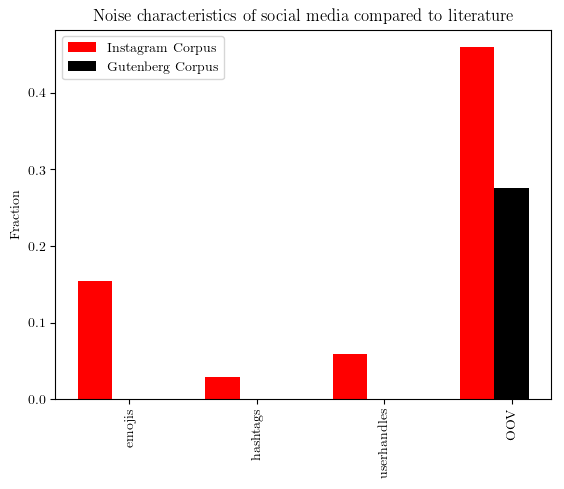

In [220]:
N = 4
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [float(len(emojis))/len(tokens), float(len(hashtags))/len(tokens), float(len(userhandles))/len(tokens), float(len(oov))/len(tokens)]
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [float(len(gutenberg_emojis))/len(gutenberg.words()),float(len(gutenberg_hashtags))/float(len(gutenberg.words())),float(len(gutenberg_userhandles))/len(gutenberg.words()), float(len(gutenberg_oov))/len(gutenberg.words())]
rects2 = ax.bar(ind+width, zvals, width, color='black')

ax.set_ylabel('Fraction')
ax.set_xticks(ind+width)
labels = ["emojis", "hashtags", "userhandles", "OOV"]
ax.set_xticklabels(labels, rotation='vertical')
ax.legend( (rects1[0], rects2[0]), ('Instagram Corpus', "Gutenberg Corpus") )
#plt.ylim((0,1))
plt.title("Noise characteristics of social media compared to literature")
plt.savefig('noise.eps', format='eps', dpi=1000)
plt.show()

In [221]:
yvals

[0.15419049941946006,
 0.02897059853813804,
 0.05903109125320581,
 0.45980286711648605]

In [27]:
from collections import Counter

In [28]:
labels, values = zip(*Counter(emojis[0:10]).items())
#indexes = np.arange(len(labels))
width = 1
plt.bar(labels, values, width)
plt.ylabel('Number of posts')
plt.xlabel('Number of candidate items')
plt.title(r'Histogram over number of candidate items in text for different posts')
#plt.savefig('figures/candidate_items_hist.pdf', format='pdf', dpi=1000)
plt.show()

UnicodeEncodeError: 'ascii' codec can't encode character u'\U0001f495' in position 228: ordinal not in range(128)

In [29]:
print(labels[0].encode("utf-8"))

💙


In [30]:
plt.rcParams.update(plt.rcParamsDefault)

In [32]:
#emojis[0:10]
#emojis2 = map(lambda x: x.encode("utf-8"), emojis)
#print(type(emojis2[0]))
#print(type(emojis[0]))

In [39]:
emojis = filter(lambda x: not x == not1 and not x == not2, emojis)

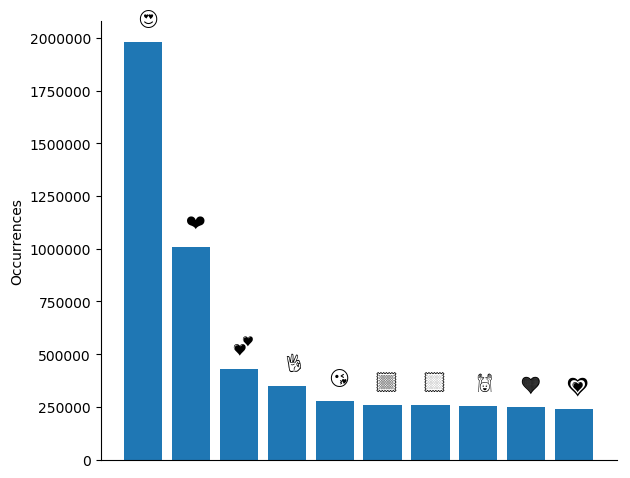

In [40]:
labels, values = zip(*Counter(emojis).most_common(10))
ax = plt.subplot(111)
ax.bar(range(0,10), values[0:10])
for label, x, y in zip(labels[0:10], range(0,10), values[0:10]):
    plt.annotate(
        label, 
        xy=(x, y), xytext=(10,10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', alpha=0),
        fontname="Symbola",
        #fontname='Segoe UI Emoji',
        fontsize=15)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Occurrences')
ax.set_xticks([])
plt.tight_layout()
plt.savefig('emojis.eps', format='eps', dpi=1000)
plt.show()

In [41]:
Counter(tokens).most_common(10)

[(u'!', 5214505),
 (u'\U0001f60d', 1978899),
 (u'love', 1182469),
 (u'\ufe0f', 1026162),
 (u'\u2764', 1008489),
 (u'the', 945839),
 (u'.', 907156),
 (u'this', 885230),
 (u'you', 872063),
 (u'i', 869848)]

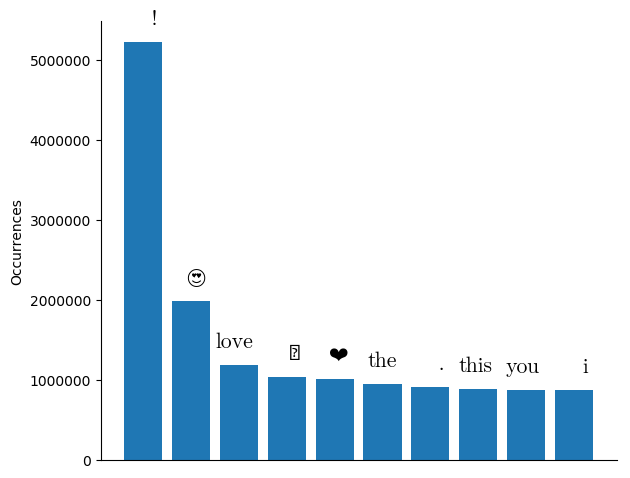

In [42]:
labels, values = zip(*Counter(tokens).most_common(10))
ax = plt.subplot(111)
ax.bar(range(0,10), values[0:10])
for label, x, y in zip(labels[0:10], range(0,10), values[0:10]):
    plt.annotate(
        label, 
        xy=(x, y), xytext=(10,10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', alpha=0),
        fontname="Symbola",
        #fontname='Segoe UI Emoji',
        fontsize=15)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Occurrences')
ax.set_xticks([])
plt.tight_layout()
#plt.savefig('emojis.eps', format='eps', dpi=1000)
plt.show()

In [43]:
not1 = labels[5]
not2 = labels[6]

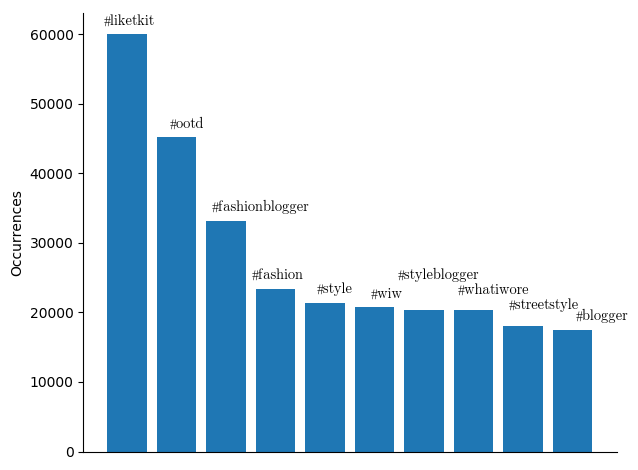

In [44]:
labels, values = zip(*Counter(hashtags).most_common(10))
ax = plt.subplot(111)
ax.bar(range(1,11), values[0:10])
for label, x, y in zip(labels[0:10], range(1,11), values[0:10]):
    if label == u"#fashionblogger":
        plt.annotate(
        label, 
        xy=(x, y), xytext=(60,5),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', alpha=0),
        fontname="Symbola",
        #fontname='Segoe UI Emoji',
        fontsize=10)
    if label in [u"#liketkit", u"#ootd"]:
        plt.annotate(
            label, 
            xy=(x, y), xytext=(20,5),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', alpha=0),
            fontname="Symbola",
            #fontname='Segoe UI Emoji',
            fontsize=10)
    if label in [u"#blogger"]:
        plt.annotate(
            label, 
            xy=(x, y), xytext=(40,5),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', alpha=0),
            fontname="Symbola",
            #fontname='Segoe UI Emoji',
            fontsize=10)
    if label in [u"#streetstyle"]:
        plt.annotate(
            label, 
            xy=(x, y), xytext=(40,10),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', alpha=0),
            fontname="Symbola",
            #fontname='Segoe UI Emoji',
            fontsize=10)
    if label in [u"#whatiwore"]:
        plt.annotate(
            label, 
            xy=(x, y), xytext=(40,10),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', alpha=0),
            fontname="Symbola",
            #fontname='Segoe UI Emoji',
            fontsize=10)
    if label in [u"#styleblogger"]:
        plt.annotate(
            label, 
            xy=(x, y), xytext=(40,20),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', alpha=0),
            fontname="Symbola",
            #fontname='Segoe UI Emoji',
            fontsize=10)
    if label in [u"#wiw", u"#style"]:
        plt.annotate(
            label, 
            xy=(x, y), xytext=(20,5),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', alpha=0),
            fontname="Symbola",
            #fontname='Segoe UI Emoji',
            fontsize=10)
    if label in [u"#fashion"]:
        plt.annotate(
            label, 
            xy=(x, y), xytext=(20,5),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', alpha=0),
            fontname="Symbola",
            #fontname='Segoe UI Emoji',
            fontsize=10)
    if label not in [u"#liketkit", u"#ootd", u"#fashionblogger", u"#blogger", u"#streetstyle", u"#fashion",u"#whatiwore", u"#styleblogger", u"#style", u"#wiw"]:
        plt.annotate(
            label, 
            xy=(x, y), xytext=(8,10),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', alpha=0),
            fontname="Symbola",
            #fontname='Segoe UI Emoji',
            fontsize=10)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Occurrences')
ax.set_xticks([])
plt.tight_layout()
plt.savefig('hashtags.eps', format='eps', dpi=1000)
plt.show()

In [45]:
values

(60013, 45194, 33181, 23427, 21429, 20733, 20351, 20306, 18122, 17487)

In [46]:
emojis[0:5]

u'\U0001f495\U0001f496\U0001f499\U0001f499\U0001f499'

In [47]:
labels, values = zip(*Counter(emojis[0:5]).items())

In [48]:
labels

(u'\U0001f499', u'\U0001f495', u'\U0001f496')

In [96]:
from wordcloud import WordCloud


In [162]:
labels, values = zip(*Counter(tokens).most_common(300))

In [163]:
wordcloud = WordCloud(max_font_size=40).generate(" ".join(labels))

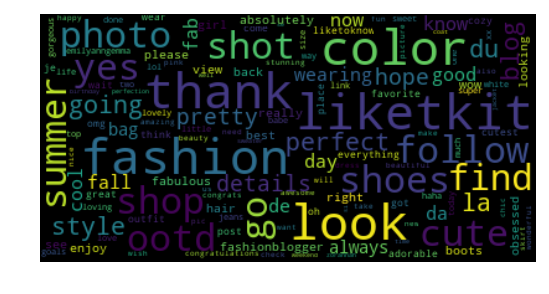

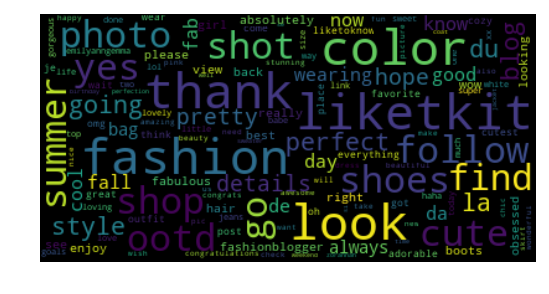

In [164]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#lower max_font_size
#wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('wordcloud.eps', format='eps', dpi=1000)
plt.show()

In [49]:
with open('./ig.csv', "r+") as file:
        text = file.read()
        text = text.replace("\r", "")
        file.seek(0)
        file.write(text)
        file.truncate()

In [234]:
import pandas as pd
df = pd.read_csv("./ig.csv", error_bad_lines=False, sep = ",", encoding = 'utf8', header=None, names=["doc", "text"])
#, sep=',', encoding = 'utf8', header=None
#names=["doc", "text"]
df.head()

,doc,text
0,https://scontent-arn2-1.cdninstagram.com/t51.2...,love the sky blue! @kiki_dkpearla me too! than...
1,a gorgeous bag bag😍😍😍😍 💙💙💙 you always have the...,NaN
2,https://scontent-arn2-1.cdninstagram.com/t51.2...,😍 beautiful dress @ajaytheartist_ thank you so...
3,https://scontent-arn2-1.cdninstagram.com/t51.2...,so cute! i can't believe how grown up he looks...
4,https://scontent-arn2-1.cdninstagram.com/t51.2...,😍 she stay kute. stays on point @awedbymoni lo...


In [235]:
df.size

394094

In [236]:
text = df["text"]

In [237]:
totalPosts = text.size

In [84]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [85]:
def countWords(row):
    tokens = tknzr.tokenize(row["text"])
    return len(tokens)

df = df.apply(countWords, axis=1)

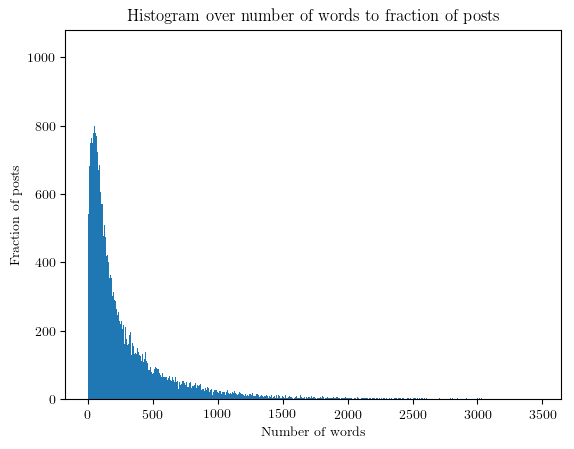

In [86]:
labels, values = zip(*Counter(df.values).items())
values = map(lambda x: float(x), values)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.ylabel('Fraction of posts')
plt.xlabel('Number of words')
plt.title(r'Histogram over number of words to fraction of posts')
plt.savefig('words_posts_hist.eps', format='eps', dpi=1000)
plt.show()

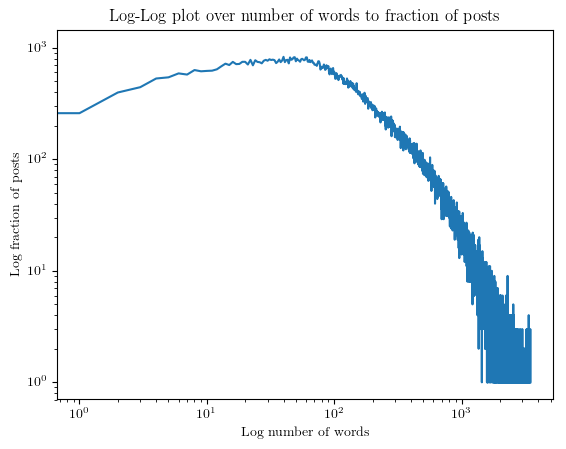

In [87]:
plt.loglog(indexes, values)
plt.ylabel('Log fraction of posts')
plt.xlabel('Log number of words')
plt.title(r'Log-Log plot over number of words to fraction of posts')
plt.savefig('words_posts_loglog.eps', format='eps', dpi=1000)
plt.show()

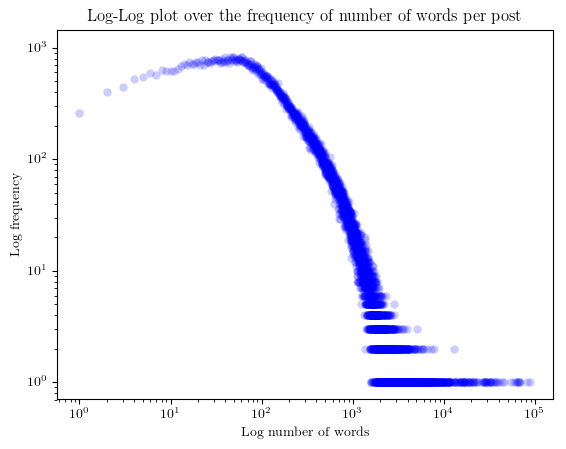

In [88]:
fig = plt.figure()
ax = plt.gca()
ax.plot(labels, values, 'o', c='blue', alpha=0.2, markeredgecolor='none')
ax.set_yscale('log')
ax.set_xscale('log')
plt.ylabel('Log frequency')
plt.xlabel('Log number of words')
plt.title(r'Log-Log plot over the frequency of number of words per post')
plt.savefig('words_posts_loglog2.eps', format='eps', dpi=1000)

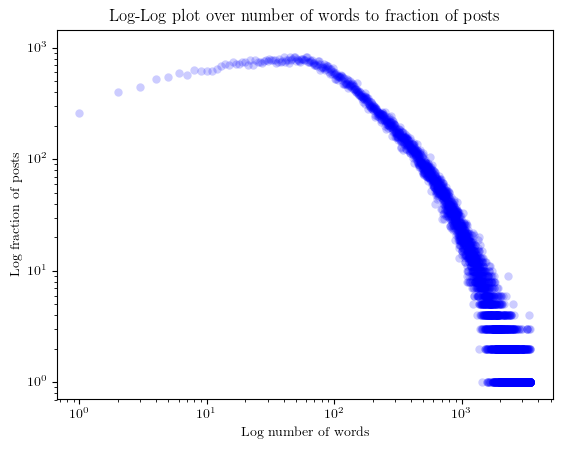

In [89]:
fig = plt.figure()
ax = plt.gca()
ax.plot(indexes, values, 'o', c='blue', alpha=0.2, markeredgecolor='none')
ax.set_yscale('log')
ax.set_xscale('log')
plt.ylabel('Log fraction of posts')
plt.xlabel('Log number of words')
plt.title(r'Log-Log plot over number of words to fraction of posts')
plt.savefig('words_posts_loglog3.eps', format='eps', dpi=1000)

In [60]:
totalPosts

197046

In [243]:
def tokenize(row):
    tokens = tknzr.tokenize(row["text"])
    return tokens

def count_emojis(tokens):
    emojis = extract_emojis(tokens)
    return len(emojis)

def count_hashtags(tokens):
    hashtags = extract_hashtags(tokens)
    return len(hashtags)

def count_userhandles(tokens):
    userhandles = extract_userhandles(tokens)
    return len(userhandles)

def count_oov(tokens):
    oov = extract_oov2(tokens)
    return len(oov)

In [241]:
df = pd.read_csv("./ig.csv", error_bad_lines=False, sep = ",", encoding = 'utf8', header=None, names=["doc", "text"])

In [244]:
df["text"] = df.apply(tokenize, axis=1)

<type 'unicode'>
<type 'float'>
<type 'unicode'>
<type 'float'>


TypeError: ('expected string or buffer', u'occurred at index 1')

In [64]:
emojis = map(lambda x: count_emojis(x), df.values)
hashtags = map(lambda x: count_hashtags(x), df.values)
userhandles = map(lambda x: count_userhandles(x), df.values)
oov = map(lambda x: count_oov(x), df.values)

TypeError: unhashable type: 'list'

In [ ]:
np.mean(emojis)

In [ ]:
np.mean(hashtags)

In [ ]:
np.mean(userhandles)

In [ ]:
np.mean(oov)

In [ ]:
np.std(emojis)

In [ ]:
np.std(hashtags)

In [ ]:
np.std(userhandles)

In [ ]:
np.std(oov)

In [ ]:
np.min(emojis)

In [ ]:
np.min(hashtags)

In [ ]:
np.min(oov)

In [ ]:
np.min(userhandles)

In [ ]:
np.max(emojis)

In [ ]:
np.max(hashtags)

In [ ]:
np.max(oov)

In [ ]:
np.max(userhandles)

In [505]:
df1 = pd.read_csv("./ig_comments.csv", error_bad_lines=False, sep="-z-x-x-x-x-y-", encoding = 'utf8', header=None, names=["comments"], engine="python")

In [502]:
def count_comments(row):
    comments = row["comments"].split(",")
    return len(comments)

In [503]:
df1["comments"] = df1.apply(count_comments, axis=1)

In [504]:
df1.head()

,comments
0,35
1,83
2,177
3,48
4,35


In [506]:
def comment_list(row):
    comments = row["comments"].split(",")
    #noComments = len(comments)
    #commentsStr" ".join(comments)
    #tokens = tknzr.tokenize(commenrsStr)
    #average = float(len(tokens))/float(len(noComments))
    return comments

In [507]:
df1["comments"] = df1.apply(comment_list, axis=1)

In [508]:
df1.values[0]

array([ list([u'love the sky blue!', u'@kiki_dkpearla me too! thanks love  happy monday', u'love the bag!! \U0001f495\U0001f496', u'@jessicalundy_ isn\u2019t it fun. thanks love.', u'that bag is so pretty!!', u'@cherrypickedstyle thank you tomeka i hope you are having an awesome monday', u'beautiful bag! \U0001f499\U0001f499', u'love this bag \U0001f499\U0001f499\U0001f499', u'omg love it \U0001f60d\U0001f60d', u'great stuff!', u'love the bag \U0001f60d\U0001f60d\U0001f60d', u'details \U0001f60d love this bag babe \U0001f499\U0001f499', u'that\u2019s a great bag!', u'\U0001f44b\U0001f44c', u'love this fun pop of color', u'love this', u"love @henribendel's latest collection!", u'i just love this pop of bright blue color. \U0001f499\U0001f499', u'\U0001f44d\U0001f3fc\U0001f64c\U0001f3fd\U0001f525', u'such a gorgeous bag', u'bag\U0001f60d\U0001f60d\U0001f60d\U0001f60d', u'\U0001f499\U0001f499\U0001f499', u'you always have the best handbags \U0001f60d', u'pretty \U0001f499\U0001f499', u'fa

In [509]:
len(df1.values)

188960

In [510]:
comments = df1.values.flatten()

In [511]:
len(comments)

188960

In [512]:
comments = comments.flatten()

In [513]:
len(comments)

188960

In [514]:
comms = []
for l in comments:
    for c in l:
        comms.append(c)

In [515]:
len(comms)

9204734

In [516]:
import langid

In [524]:
langid.classify(u"Mitt namn är Kim Hello dude what is your name? Nice")

('en', -202.32552576065063)

In [519]:
comms[0]

u'love the sky blue!'

In [525]:
langs = map(lambda x: langid.classify(x), comms)

In [540]:
langs

[('en', -35.79053783416748),
 ('en', -6.015987157821655),
 ('en', -57.62565755844116),
 ('en', -50.125434160232544),
 ('en', -75.57722091674805),
 ('en', -102.35072255134583),
 ('ms', -36.77182102203369),
 ('en', -64.88403725624084),
 ('ml', -12.387055397033691),
 ('de', 3.030979633331299),
 ('en', -63.9928297996521),
 ('en', -80.82462239265442),
 ('en', -34.30848217010498),
 ('ja', -7.941030025482178),
 ('en', -65.5941002368927),
 ('en', -6.402380704879761),
 ('da', -26.85988712310791),
 ('en', -75.04624819755554),
 ('zh', -28.13015103340149),
 ('en', -17.75536346435547),
 ('am', -18.601236581802368),
 ('km', -3.9800548553466797),
 ('en', -77.28040504455566),
 ('km', -34.43167972564697),
 ('en', 9.061840057373047),
 ('en', -39.36013317108154),
 ('hr', -50.703375577926636),
 ('en', -54.36186909675598),
 ('ms', -53.59250783920288),
 ('cy', -37.24344301223755),
 ('en', -65.19735074043274),
 ('la', -108.89070224761963),
 ('en', -7.400597095489502),
 ('en', -169.81775426864624),
 ('en', -9

In [528]:
langsdist = map(lambda x: x[0], langs)

In [549]:
co = Counter(langsdist).items()
#print co[0]
co = map(lambda x: (x[0], float(x[1])/float(len(comms))), co)
co

[('gu', 5.508035321824618e-05),
 ('ga', 0.000724192573082503),
 ('gl', 0.0004419465027452178),
 ('lb', 0.0020331929200778642),
 ('la', 0.012293674102912697),
 ('lo', 0.0004776889804746123),
 ('tr', 0.001967139952115944),
 ('lv', 0.0013873296067002045),
 ('tl', 0.001215026963299537),
 ('th', 0.0012836872852599543),
 ('te', 0.0001498142151636321),
 ('ta', 0.0016823951675300991),
 ('de', 0.03185643387413477),
 ('ko', 0.004057260101160989),
 ('da', 0.005215794394493095),
 ('dz', 0.0007001831883463444),
 ('qu', 0.0010786840771281386),
 ('kn', 0.00026214771659887183),
 ('el', 0.00031668487106743115),
 ('eo', 0.001007307761419287),
 ('en', 0.5260032500667591),
 ('zh', 0.06794601560457912),
 ('eu', 0.002061113335811768),
 ('zu', 0.0003159243928178696),
 ('es', 0.020936074850180352),
 ('ru', 0.0007922010565432961),
 ('rw', 0.0007664534358081396),
 ('ro', 0.003901796619000614),
 ('bn', 0.00024335303985970698),
 ('be', 9.429930294563646e-05),
 ('bg', 6.637888721173257e-05),
 ('ms', 0.001244794254

In [550]:
len(co)

97

In [531]:
langScores = Counter(langsdist).most_common(10)

In [532]:
langScores

[('en', 4841720),
 ('zh', 625425),
 ('ja', 496639),
 ('de', 293230),
 ('es', 192711),
 ('it', 185546),
 ('sl', 180183),
 ('km', 164749),
 ('he', 157759),
 ('fi', 152613)]

In [536]:
labels, values = zip(*Counter(langsdist).most_common(10))

In [537]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', "red", "aqua", "chocolate", "beige", "indigo", "magenta"]

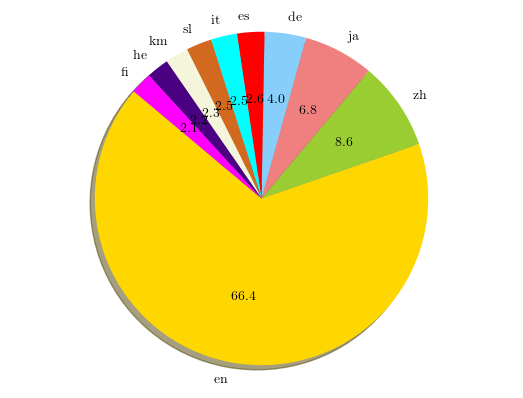

In [539]:
plt.pie(values, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
#plt.savefig('figures/brand_inference.pdf', format='pdf', dpi=1000)
plt.show()

In [ ]:
commlens = map(lambda x: len())

In [210]:
commentLengths = map(lambda x: len(tknzr.tokenize(x)), comms)

In [211]:
len(commentLengths)

9204734

In [213]:
np.array(commentLengths).mean()

6.0553960603315637

In [214]:
np.array(commentLengths).max()

1303

In [215]:
np.array(commentLengths).min()

0

In [69]:
totalPosts2 = df1.size

In [70]:
totalPosts2

188960

In [71]:
df1["comments"].values

array([ 35,  83, 177, ...,   1,   1,   3])

In [74]:
labels3, values3 = zip(*Counter(df1["comments"].values).items())
#values = map(lambda x: float(x), values)
indexes3 = np.arange(len(labels))

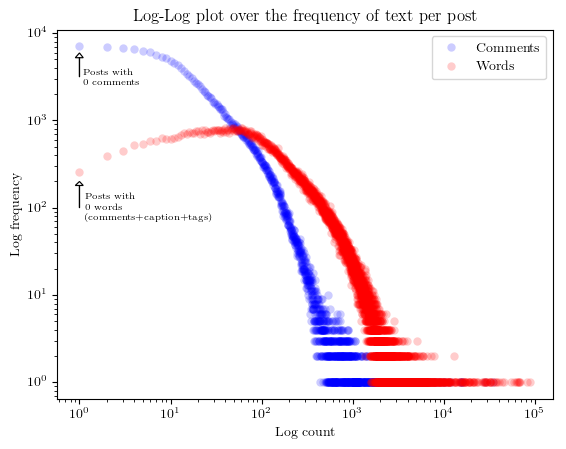

In [176]:
fig = plt.figure()
ax = plt.gca()
ax.plot(labels3, values3, 'o', c='blue', alpha=0.2, markeredgecolor='none', label="Comments")
ax.plot(labels, values, 'o', c='red', alpha=0.2, markeredgecolor='none', label="Words")
ax.set_yscale('log')
ax.set_xscale('log')
ax.arrow(1, math.pow(10,3.5), 0, math.pow(10,math.log(values3[0],10))-5000, head_width=0.2, head_length=700.5, linewidth=0.85,fc='k', ec='k', fill=False)
ax.annotate("Posts with \n0 comments", xy=(1.1, math.pow(10,3.4)), fontsize=7)
ax.arrow(1, math.pow(10,2), 0, math.pow(10,math.log(values[0],10))-950, head_width=0.2, head_length=20, linewidth=0.85,fc='k', ec='k', fill=False)
ax.annotate("Posts with \n0 words\n(comments+caption+tags)", xy=(1.15, math.pow(10,1.85)), fontsize=7)
plt.ylabel('Log frequency')
plt.xlabel('Log count')
plt.title(r'Log-Log plot over the frequency of text per post')
#plt.title(r'Log-Log plot over the frequency of number of comments per post')
plt.legend()
plt.savefig('comments_words_posts_loglog2.eps', format='eps', dpi=1000)

In [110]:
import math

In [111]:
labels3[0]

1

In [112]:
values3[0]

7075

In [117]:
math.log(values3[0], 10)

3.8497264441963277

In [118]:
math.log(labels3[0], 10)

0.0

In [106]:
labels[0]

0

In [107]:
values[0]

1030.0